# Probability and Statistical models

## Axioms of Probability


Given a sample space S such that S is a set that contains all possible outcomes from a *random experiment* the following axioms hold

1. $P(S) = 1$
2. $If A \cap B = \emptyset, then P(A \cup B) = P(A) + P(B)$
3. $P(A^c) = 1 - P(A)$
4. $If P(A) > 0, P(A|B) = \frac{P(A \cap B)}{P(B)}$
5. $If P(A) > 0, P(B | A) = \frac{P(A \cap B)}{P(A)}$
6. If events $A_{1}, ...,A_{n}$  are **independent**

  $P\{A_{1} \cup ... \cup A_{n} \} = P\{A_{1}\} ... P\{A_{n}\}$

### Bayes Theorem
A mathematical formula for determining conditional probability between random variables.The theorem provides a way to revise existing predictions or theories given new or additional evidence.

Take a [*partition*](https://en.wikipedia.org/wiki/Partition_of_a_set) of the sample space S, B such that: 

$B_{1},..B_{k} s.t. B_{i} \cap B_{j} = \emptyset$,    if $i \ne j$ and 
$B_{1} \cup B_{2}\cup ... B_{K} = S$

$A = (A \cap B_{1}) \cup...\cup(A \cap B_{K})$

=> $P(A) = P(A \cap B) +...+ P(A \cap B_{K})$

**Bayes Formula is:**

$P(B_{j} | A) = \frac{P(A|B_{j})P(B_{j})}{P(A)} = \frac{P(A|B_{j})P(B_{j})}{P(A|B_{1})P(B_{1}) +...+ P(A|B_{K})P(B_{K})}$

## Probability Distributions

The set of all possible values of a *random variable* and the probabilities of each of these values equalling the variable.
* If the random variables are finite or countably infinite they are considered a *discrete* random variables.
  - these can be modelled as distribution 
* Else if the random variable can take any value within an interval it is called a *continuous* random variable
  - these are modelled using a **probability density function(PDF)**


### Cumulative distribution functions
The **cumulative distribution function (CDF) ** of a random variable X is defined as:

$F_{X}(x) = P\{X \le x\}$

If X can be modelled with the probability distribution function $f_{X}$ then:

$F_{X}(x) = \int_{-\infty}^x f_{X}(u)\, du$

If we want to know the probability of X occuring given that $a\le X \le b$ we use the CDF which tells us that $P\{ a \le X \le b\} = F_{X}(b) - F_{X}(a) $

### Quantiles and percentiles

If the CDF of X is continuous and strictly increasing then it has an inverse function $F^{-1}$.

$\forall q : 0 \lt q \lt 1 , F^{-1}(q)$ is called the q-**quantile**

### Expectations and variances
The **expectation** or expected value of a ***continuous*** random variable X is 

$$E(X) = \int_{+\infty}^{-\infty}xf_{x}(x)\, dx$$

If X is ***discrete*** then 

$$E(X) = \sum_{i=1}^{n} x_{i}P_{i}$$

Where n is all possible values of X and P are the probabilities of those values.

The **variance** of X is
$$\sigma_{x}^2 = E\{X - E(X)\}^2$$

Therefore if X is continuous, the variance is:
$$\sigma_{x}^2 = \int \{ x - E(X) \}^2 f_{X}(x)\, dx$$

and if X is discrete, the variance is:

$$\sigma_{x}^2 = \sum_{i=1}^{n}\{x_{i} - E(X)\}^2P_{i}$$

Another format for **variance** is:
$$ \sigma_{x}^2 = E(X^2) - \{E(X)\}^2 $$

The **standard deviation** of X $\sigma_{X}$ is $\sqrt{E\{X - E(X)\}^2}$


## The Binomial Distribution

Given we conduct *n* experiments where there are 2 possible outcomes A and B
with P(A) = p and P(B) = 1 - p and that the probability of each outcome in each individual experiment is the same. We can say that the total number of an event occurring in n experiments can be expressed using the binomial formula:
$$ \binom n k = \frac{n!}{k!(n-k)!} $$
Therefore the binomial distribution is:
$$P(X = k) = \binom n k p^k(1-p)^{n-k} for k = 0,1,2,...,n  $$

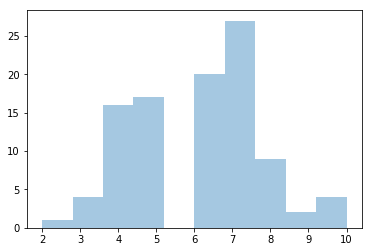

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bindist = [np.random.binomial(n=10, p=0.6) for _ in range(100)]
sns.distplot(bindist, kde=False)


## Location , Scale and Shape Parameters

Parameters can be classified as location, scale or shape depending on the effect they have on the distribution:

- **location parameter: ** Shifts the distribution to the right or left without changing it's shape or standard deviation
- **scale parameter: ** If it is a constant multiple of the standard deviation.
- **shape parameter: ** Modifies the shape of the distribution e.g. p in binomial(n,p)

## Common Continuous Distribution

### Uniform distributions 
The uniform distribution of a given interval [a,b] can be denoted as Uniform[a,b] and will have a PDF of 1/(b-a) on [a,b] and 0 if outside the a,b interval

If X is uniformly distributed then 
$$E(X) = \frac{1}{b-a} \int_{a}^bx\, dx = \frac{a + b}{2}$$

*Reparameterisation* - the act of replacing the parameters of a distribution by an equivalent set. 

If you reparameterise a uniform distribution with $\mu = (a + b)/2 and \sigma = (b - a) / \sqrt{12}$ then $\mu$ represents the *location parameter* for the distribution and $\sigma$ will represent its scale.



### Normal Distributions

Normal distributions are described by *probability density functions* the **standard normal distribution** is described by

$$\phi(x) = \frac{1}{\sqrt{2\pi}}e^{(-x^2 / 2)}, \ -\infty \lt x \lt \infty$$

standard normal dist has mean 0 and variance of 1, and can be denoted as $Z$ 

$N(\mu, \sigma^2) = \mu +\sigma Z$

where the mean denotes the location, and std the scale as shown below

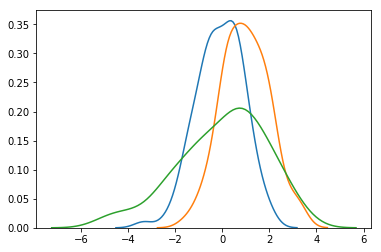

In [2]:
def gen_distplot(mean, std):
    normdist = [np.random.normal(loc=mean, scale=std) for _ in range(100)]
    sns.distplot(normdist, hist=False)

gen_distplot(0, 1) # blue
gen_distplot(1, 1) # orange
gen_distplot(0, 2) # green

### Log normal distribution

X is said to have a Lognormal distribution if log(X) is normally distributed. This gives numerous other attributes, i.e. the median of X is $e^\mu$ and $E(X) = e^{(\mu+\sigma^2 / 2)}$

For a lognormal distribution $\mu$ is the scale parameter and $\sigma$ the shape parameter the lognormal distribution doesn't have a location parameter, it's location is fixed to 0(log(1) = 0)

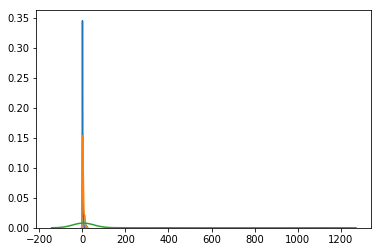

In [3]:
def gen_distplot(mean, std):
    lognormdist = [np.random.lognormal(mean=mean, sigma=std) for _ in range(100)]
    sns.distplot(lognormdist, hist=False)
    
gen_distplot(0, 1) # blue
gen_distplot(1, 1) # orange
gen_distplot(0, 2) # green

## Sampling a Normal Distribution

It is common for the population(distribution) to be too big to extract useful information from it. A common technique for dealing with this is to sample the distribution to obtain confidence intervals for the mean nad varieance or to test hypotheses about these parameters.


There are a family of different distributions based on sampling the normal distribution:
 * Chi-squared distributions
 * t-distributions
 * F-distributions


## Skewness and Kurtosis


Skewness and kurtosis measure the shape of probability distributions:

### Skewness

**Skewness: ** A measure of the asymmetry of a distribution. If a distribution is symmetrical then it has a skewness of 0. If skew is **negative** it is skewed **left**(left tail is long), while if skew is **positive** it is **right**(right tail is long).

In a normal distribution has value 0.

$$Sk = \big\{\frac{X - E(X)}{\sigma}\big\}^3$$

For a binomial distribution
$$Sk(n,p) = \frac{1 - 2p}{\sqrt{np(1-p)}}$$

### Kurtosis
**Kurtosis: ** A measure of how heavy the tails are in an asymmetric distribution. Data with high kurtosis tends to have heavy tails and a lot of *outliers*. 

The Kurtosis of a normal distribution is 3.

## Pareto Distributions (**MORE RESEARCH NEEDED**)

A law that indicates the probability that a given random variable is higher than some threshold x. It can be characterised by:
$$ Cx^{-a} $$

where C and a are positive constants **independent** of x.

- CDF, F(x):
    $$F(x) = 1 - \big(\frac{c}{x}\big)^a,\ \ \ x > c$$
    
- PDF, f(x):
    $$f(x) = \frac{ac^a}{x^{a+1}},\ \ \ x > c$$

Formal definition:
 *If X is a random variable th pareto type 1, the probability that X is greater than some function is:*
 $$\bar{F}(x) = Pr(X > x) = \cases{(\frac{x_m}{x})^a\ \ x \ge x_m, \\
 1\ \ x \lt x_m,}$$
 
*Where x_* 


## Law of Large Numbers and Central Limit Theorem(CTL)

- **Law of Large Numbers: ** Given $\bar{X}_n$ is the mean of a sample of size n in a population
$$P(\bar{X}_n \rightarrow \mu as n \rightarrow \infty) = 1$$
As the sample size approaches infinity the **sample mean** approaches the **population mean**
- **Central Limit Theorem: ** The probability of $\bar{X}_n$ approaches the normal distribution as *n* converges to $\infty$.
$$P\{\sqrt{n}(\bar{X}_n - \mu) \lt x\} \rightarrow \phi(x/\sigma)\ as\ n \rightarrow \infty for all x$$

## Multivariate Distributions


### Correlation and Covariance
Given 2 Random variables we can use Correlation and Covariance to describe their _joint_ behaviour. 
The Covariance of 2 random variables X and Y is $\sigma_{XY}$.
$$\sigma_{XY} = E\big[\{X - E(X)\} \cdot \{Y - E(Y)\}\big]$$

If X and Y are continuously distributed then:
$$\sigma_{XY} = \int\{X - E(X)\} \cdot \{Y - E(Y)\}\ f_{XY}(X, Y)\, dxdy$$

While covariance can be used to measure the linear association between random variables its value is affected by the variability (std) of each variable. Therefore, generally, the higher the variability the higher the covariance.

Correlation is the covariance with the variability normalised out. This gives a *purer* measure of how closely the variables are related.

The correlation coefficient of two variables X and Y is:
$$\rho_{XY} = \sigma_{XY} / (\sigma_X \cdot \sigma_Y)$$

If we take a bivariate sample from some multivariate normal distribution $\{(X_i Y_i)\}_{i = 1}^n$

sample covariance:
$$\hat{\sigma_{XY}} = s_{XY} = (n-1)^{-1} \cdot \sum^n_{i=1} (X_i - \bar{X}) \cdot (Y_i - \bar{Y})$$

sample correlation:
$$\hat{\rho_{XY}} = r_{XY} = \frac{s_{XY}}{s_X \cdot s_Y}$$

**NB: **
- $s_X =$  the sample the standard deviation of X  
- $s_Y =$ the sample the standard deviation of Y 
- A scatterplot is just a plot of the bivariate sample
- correlation ranges from -1 to 1:
    - if absolute value equals 1 they are very correlated
        - the sign of the value indicates the direction of the correlation
    - if absolute value equals 0 they are uncorrelated

## Prediction

Given a random variable X can we predict the value of another random variable Y. e.g. given the price of a stock can we predict the price of another.

### Best Linear Predictor
Linear prediction is very closely related to linear regression it is a line equation where by we make estimates of the parameters.
Linear Predictor of Y based on X is the function $\beta_0 + \beta_1X$

**Best linear prediction** is when the parameters $\beta_0$ and $\beta_1$ minimize the expected squared prediction error:
$$E(error^2) = E\{Y - (\beta_0 + \beta_1X)\}^2 $$

This can be expanded to :

$E\big[Y^2 - 2Y(\beta_0 + \beta_1X) + (\beta_0 + \beta_1X)^2\big]$

$E(Y^2) - 2\beta_0 E(Y) + 2\beta_1 E(XY) + (\beta_0 + \beta_1X)^2$

we can then take partial derivatives to minimise the expression.

Following the algebra we get a best linear predictor of Y is:
$$\hat{Y} = \beta_0 + \beta_1X = E(Y) + \frac{\sigma_{XY}}{\sigma^2_X}\{X - E(X)\}$$

*Note: This formula relies on the knowledge of E(X), E(Y), $\sigma_{XY}$ and $\sigma^2_X$ estimates* 


### Prediction error

The error of a predictor $\hat{Y}$ is just $Y - \hat{Y}$

So the expected squared prediciton error will be
$$E\{Y - \hat{Y}\}^2 = \sigma^2_Y - \frac{\sigma^2_{XY}}{\sigma^2_X} = \sigma^2_Y(1 - \rho^2_XY)$$

**How much extra value do the features (the matrix X) add to the predictor?**

Well if we remove X from the equation and instead have a constant $c$ we can say: $E(Y - c) ^2 = \sigma^2_Y + \{c - E(Y)\}^2$

To minimise the expected squared error we make $c = E(Y)$ this means the best value of the squared error is $\sigma^2_Y$. 

Therefore compared to the previous equation... adding X reduces the squared error to a smaller value $\sigma^2_Y(1 - \rho^2_XY)$

e.g. if $\rho_XY= 0.5$ we have the prediction error reduced by 25% as $\rho^2_XY= 0.25$
so if $\sigma^2_Y = 3$ we have and error of $3\{1 - 0.25\}$

*Note: if Y is independent of all available information i.e. Y is independent of X. Then the best predictor of Y is E(Y)*

## Conditional Distributions
**def: -** A conditional distribution is a probability distribution for a sub-population. In other words, it shows the probability that a randomly selected item in a sub-population has a characteristic you're interested.

Given that the joint density of a pair of random variables(X, Y) can be calculated using $f_XY(x,y)$ then the marginal density of either X or Y can be found by *integrating out* the other term. i.e. the density of X, $f_X$ given $f_XY$ we do:

$$f_X(x) = \int f_XY(x,y)\, dy$$

And the **conditional density** is:

$$f_{Y|X}(y|x) = \frac{f_XY(x,y)}{f_X(x)}$$

This can then be used to calculate the conditional expectation of Y. If we substitute in the **conditional density** equation we can calculate the *conditional expectation*
$$E(Y | X = x) = \int \{y - E(Y|X = x)\}^2f_{Y|X} (y|x)\, dy$$

And the same can be done for Variance

$$Var(Y|X = x) = \int \{y - E(Y|X = x)\}^2f_{Y|X}(y|x)\, dy$$